# SWOT PIXC pre processing

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

### One file test

In [2]:
# ---------- Filepath ----------
aufeis_test_tile_filepath = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/SWOT_L2_HR_PIXC_033_487_278R_20250605T070551_20250605T070602_PID0_01.nc"

# NetCDF structure check
import netCDF4
data_structure = netCDF4.Dataset(aufeis_test_tile_filepath)
# print(data_structure) # shows 'groups: pixel_cloud, tvp, noise'

# file pointer
fp = xr.open_dataset(aufeis_test_tile_filepath, group = 'pixel_cloud')
# print(fp)
# print(fp.attrs)

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# ------------ load snow mask data ------------

# filepaths
filepath = "../../../../shared_space/SWOT_Aufeis/snow_mask/poly_01_20250719_snow.tif"
snowmask_src = rasterio.open(filepath)

# Read HLS band 1 data
snowmask_20250603 = snowmask_src.read(1)


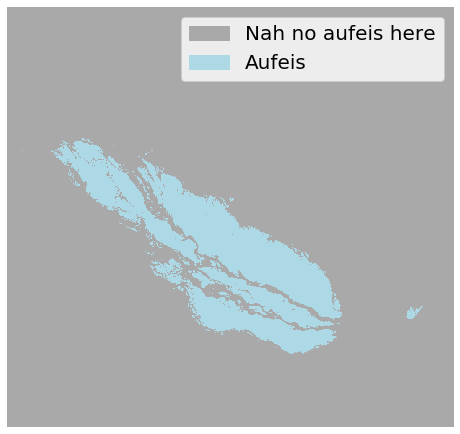

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define custom colormap: 0 = dark gray, 1 = light blue
cmap = mcolors.ListedColormap(['darkgray', 'lightblue'])
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(snowmask_20250603, cmap=cmap, norm=norm)
plt.axis('off')

# Add legend
legend_patches = [
    mpatches.Patch(color='darkgray', label='Nah no aufeis here'),
    mpatches.Patch(color='lightblue', label='Aufeis')
]
plt.legend(handles=legend_patches, loc='upper right', frameon=True, fontsize=20)

plt.show()
